In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trainer

In [2]:
TRAINER_RESULTS = {
    "MinAtar/DQN": "shapley/minatar_dqn/trainer_shapley_final.csv",
    "MinAtar/Ordered/DQN[NR]": "shapley/minatar_ordered_dqn/trainer_nowak_radzik_final.csv",
    "MinAtar/Ordered/DQN[SB]": "shapley/minatar_ordered_dqn/trainer_sanchez_bergantinos_final.csv",
    "SparseIPD/PPO": "shapley/sipd_ppo/trainer_shapley_final.csv",
    "SparseIPD/Ordered/PPO[NR]": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv",
    "SparseIPD/Ordered/PPO[SB]": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv"
}

In [19]:
def display_shapley(file: str, title: str, pure_only: bool=True):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies
    if pure_only:
        df = df[df.index]
    plt.figure(figsize=(20,20))
    # plt.figure()
    hm = sns.heatmap(
        df, 
        cmap='viridis', 
        linewidths=0.1, 
        annot=True, 
        fmt='.2f',
        # vmin=-0.5, vmax=0.5
    )
    hm.set(xlabel="$EVAL$", ylabel="$SHAPLEY$", title=title)
    hm.autoscale(True)
    hm.tick_params(top=False, bottom=True,
                labeltop=False, labelbottom=True)
    plt.setp(hm.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")

In [ ]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result)

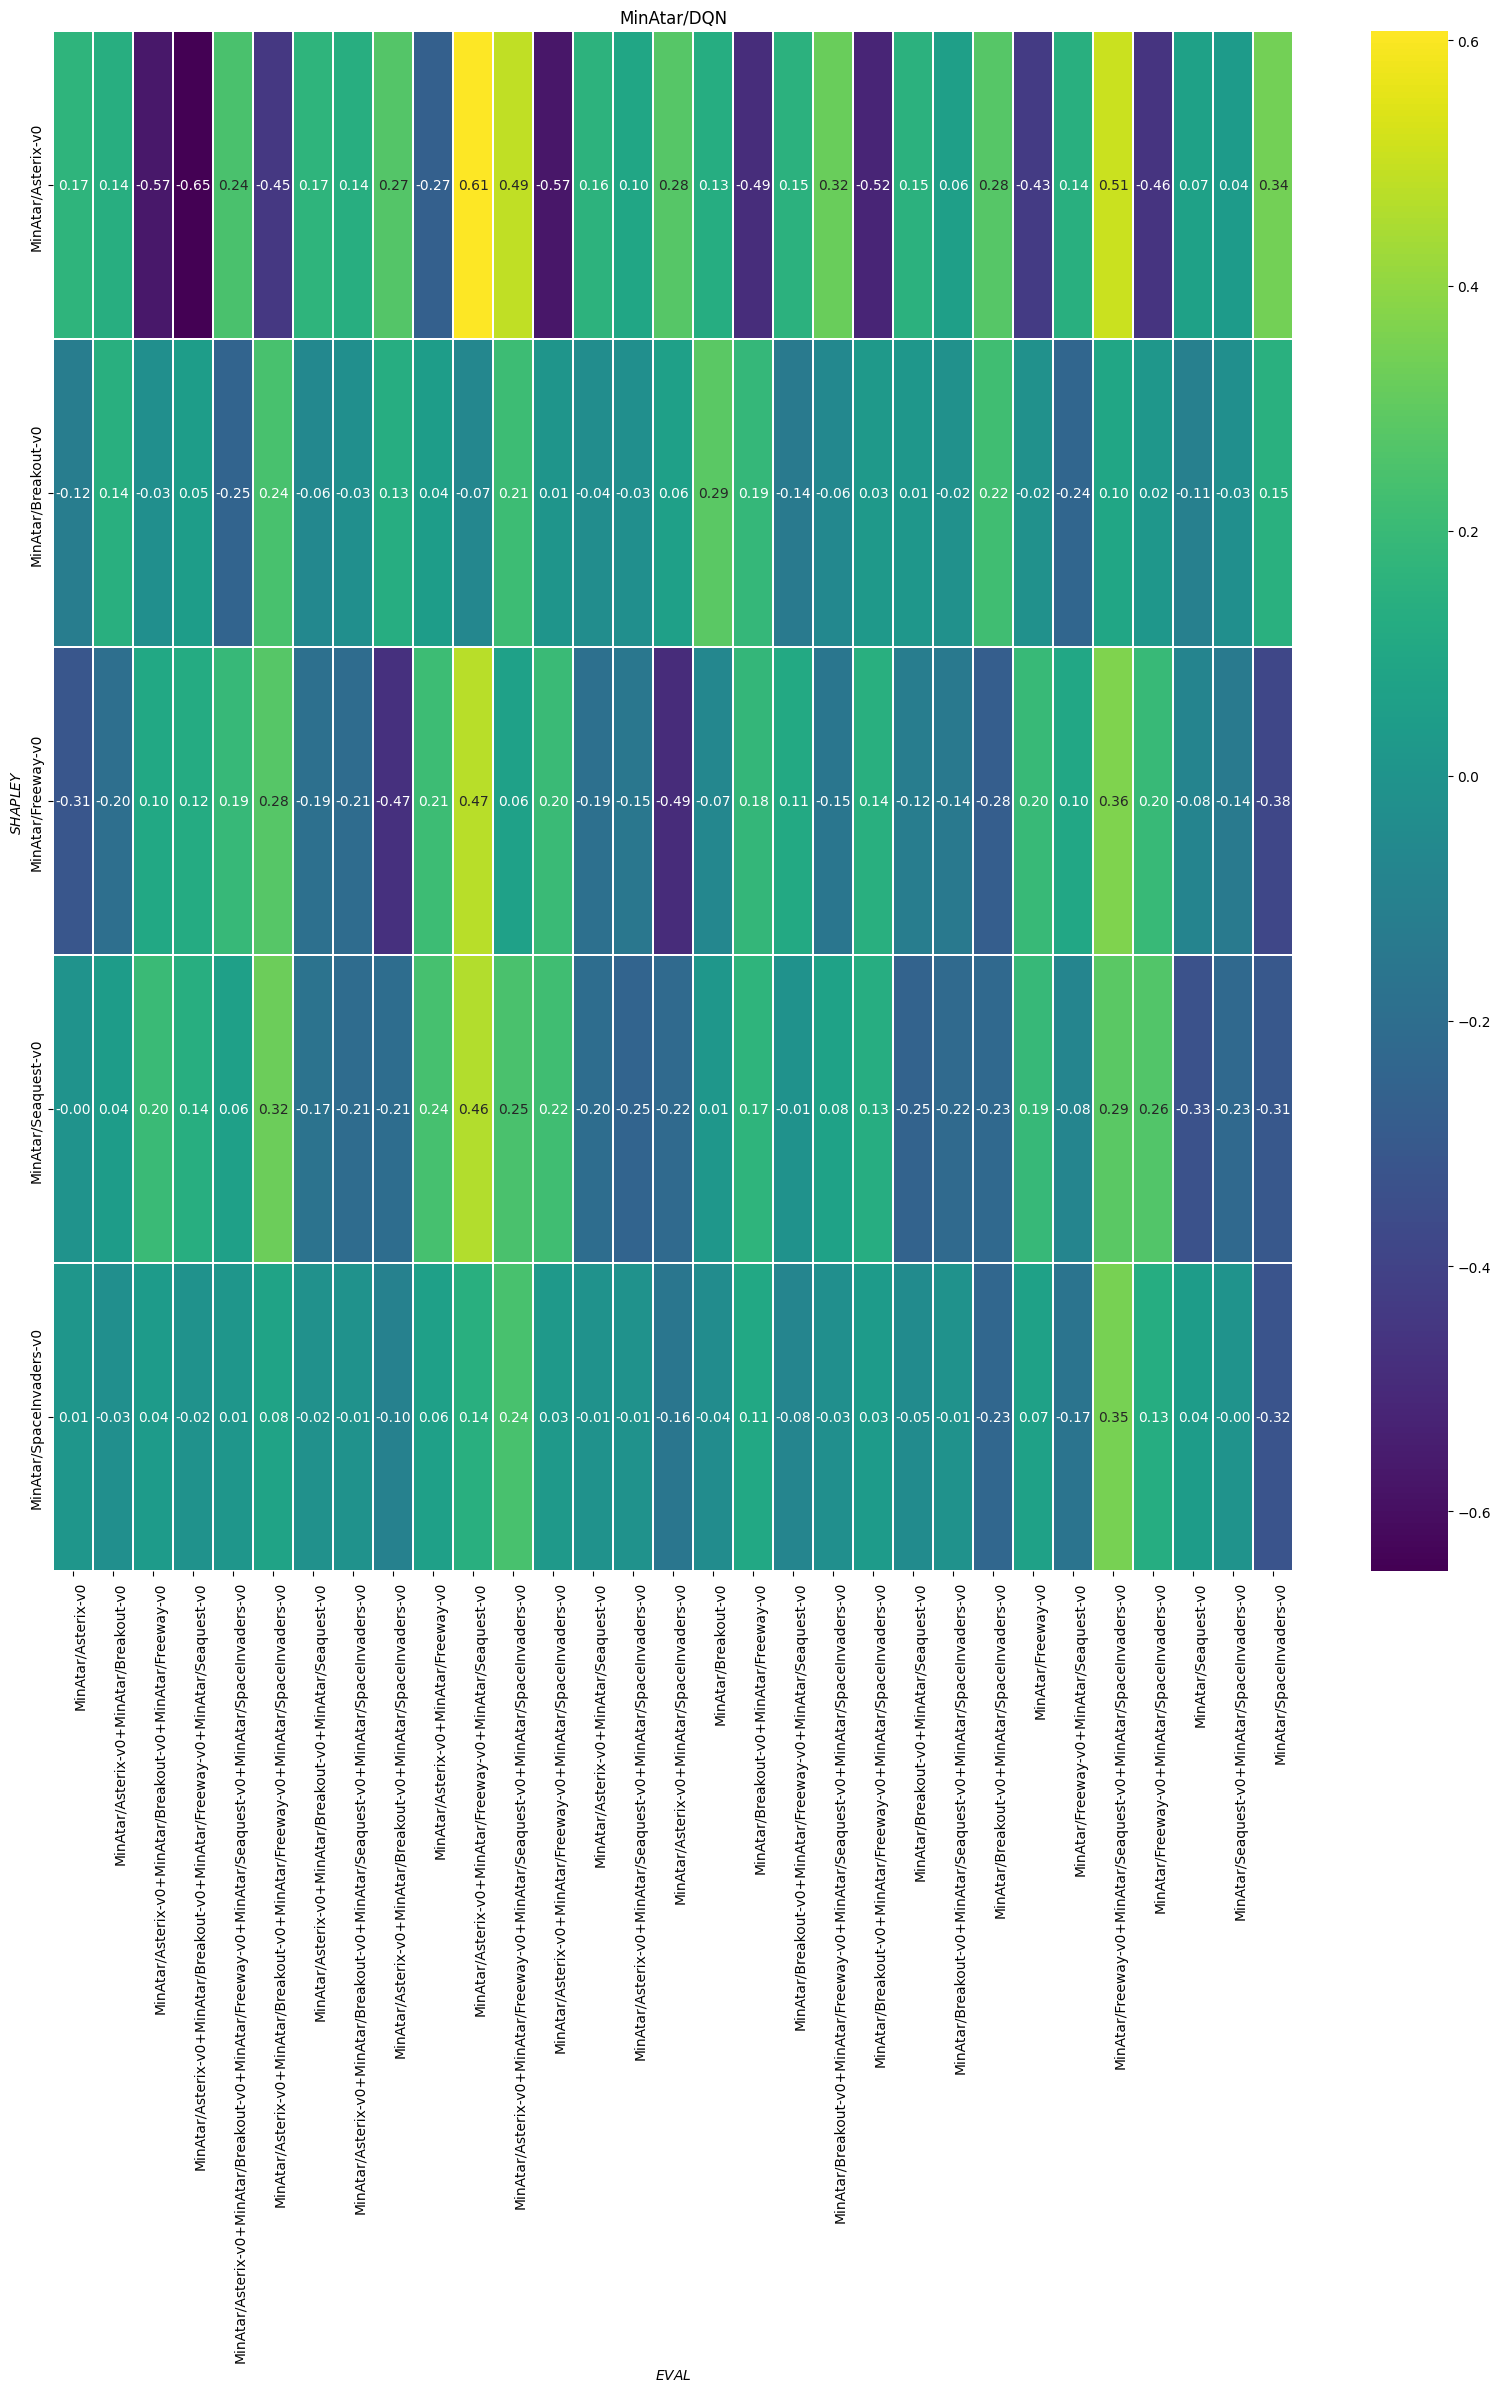

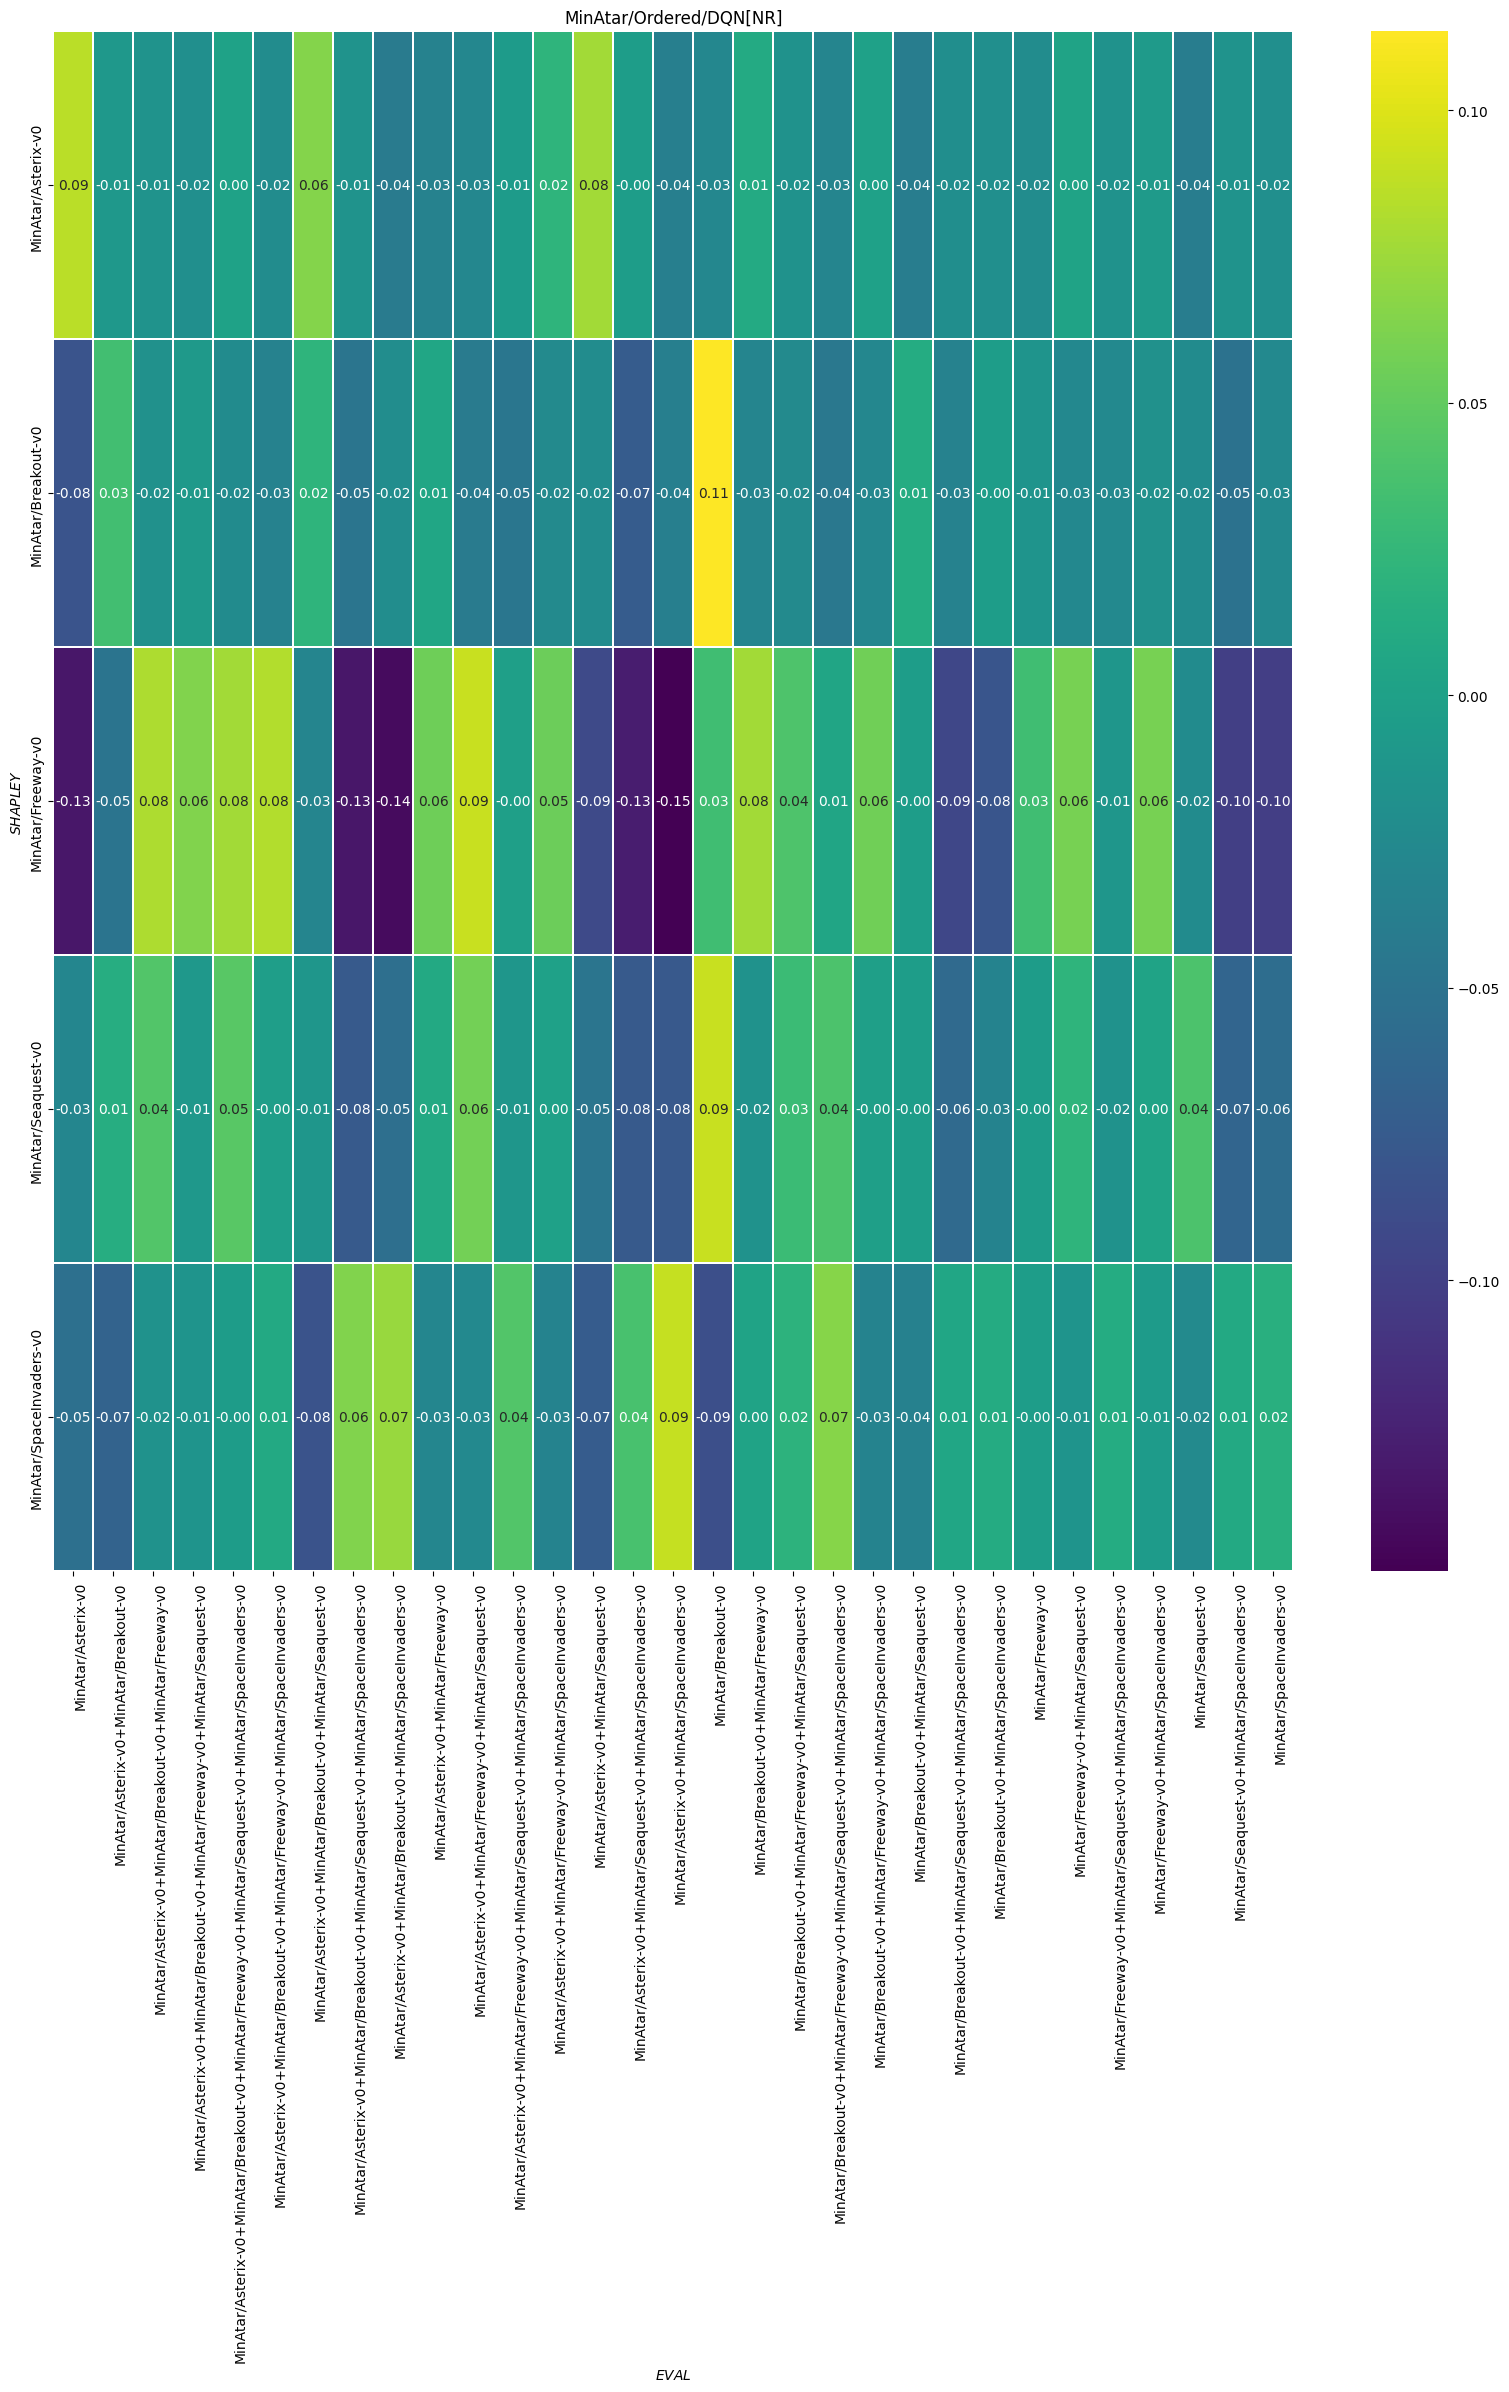

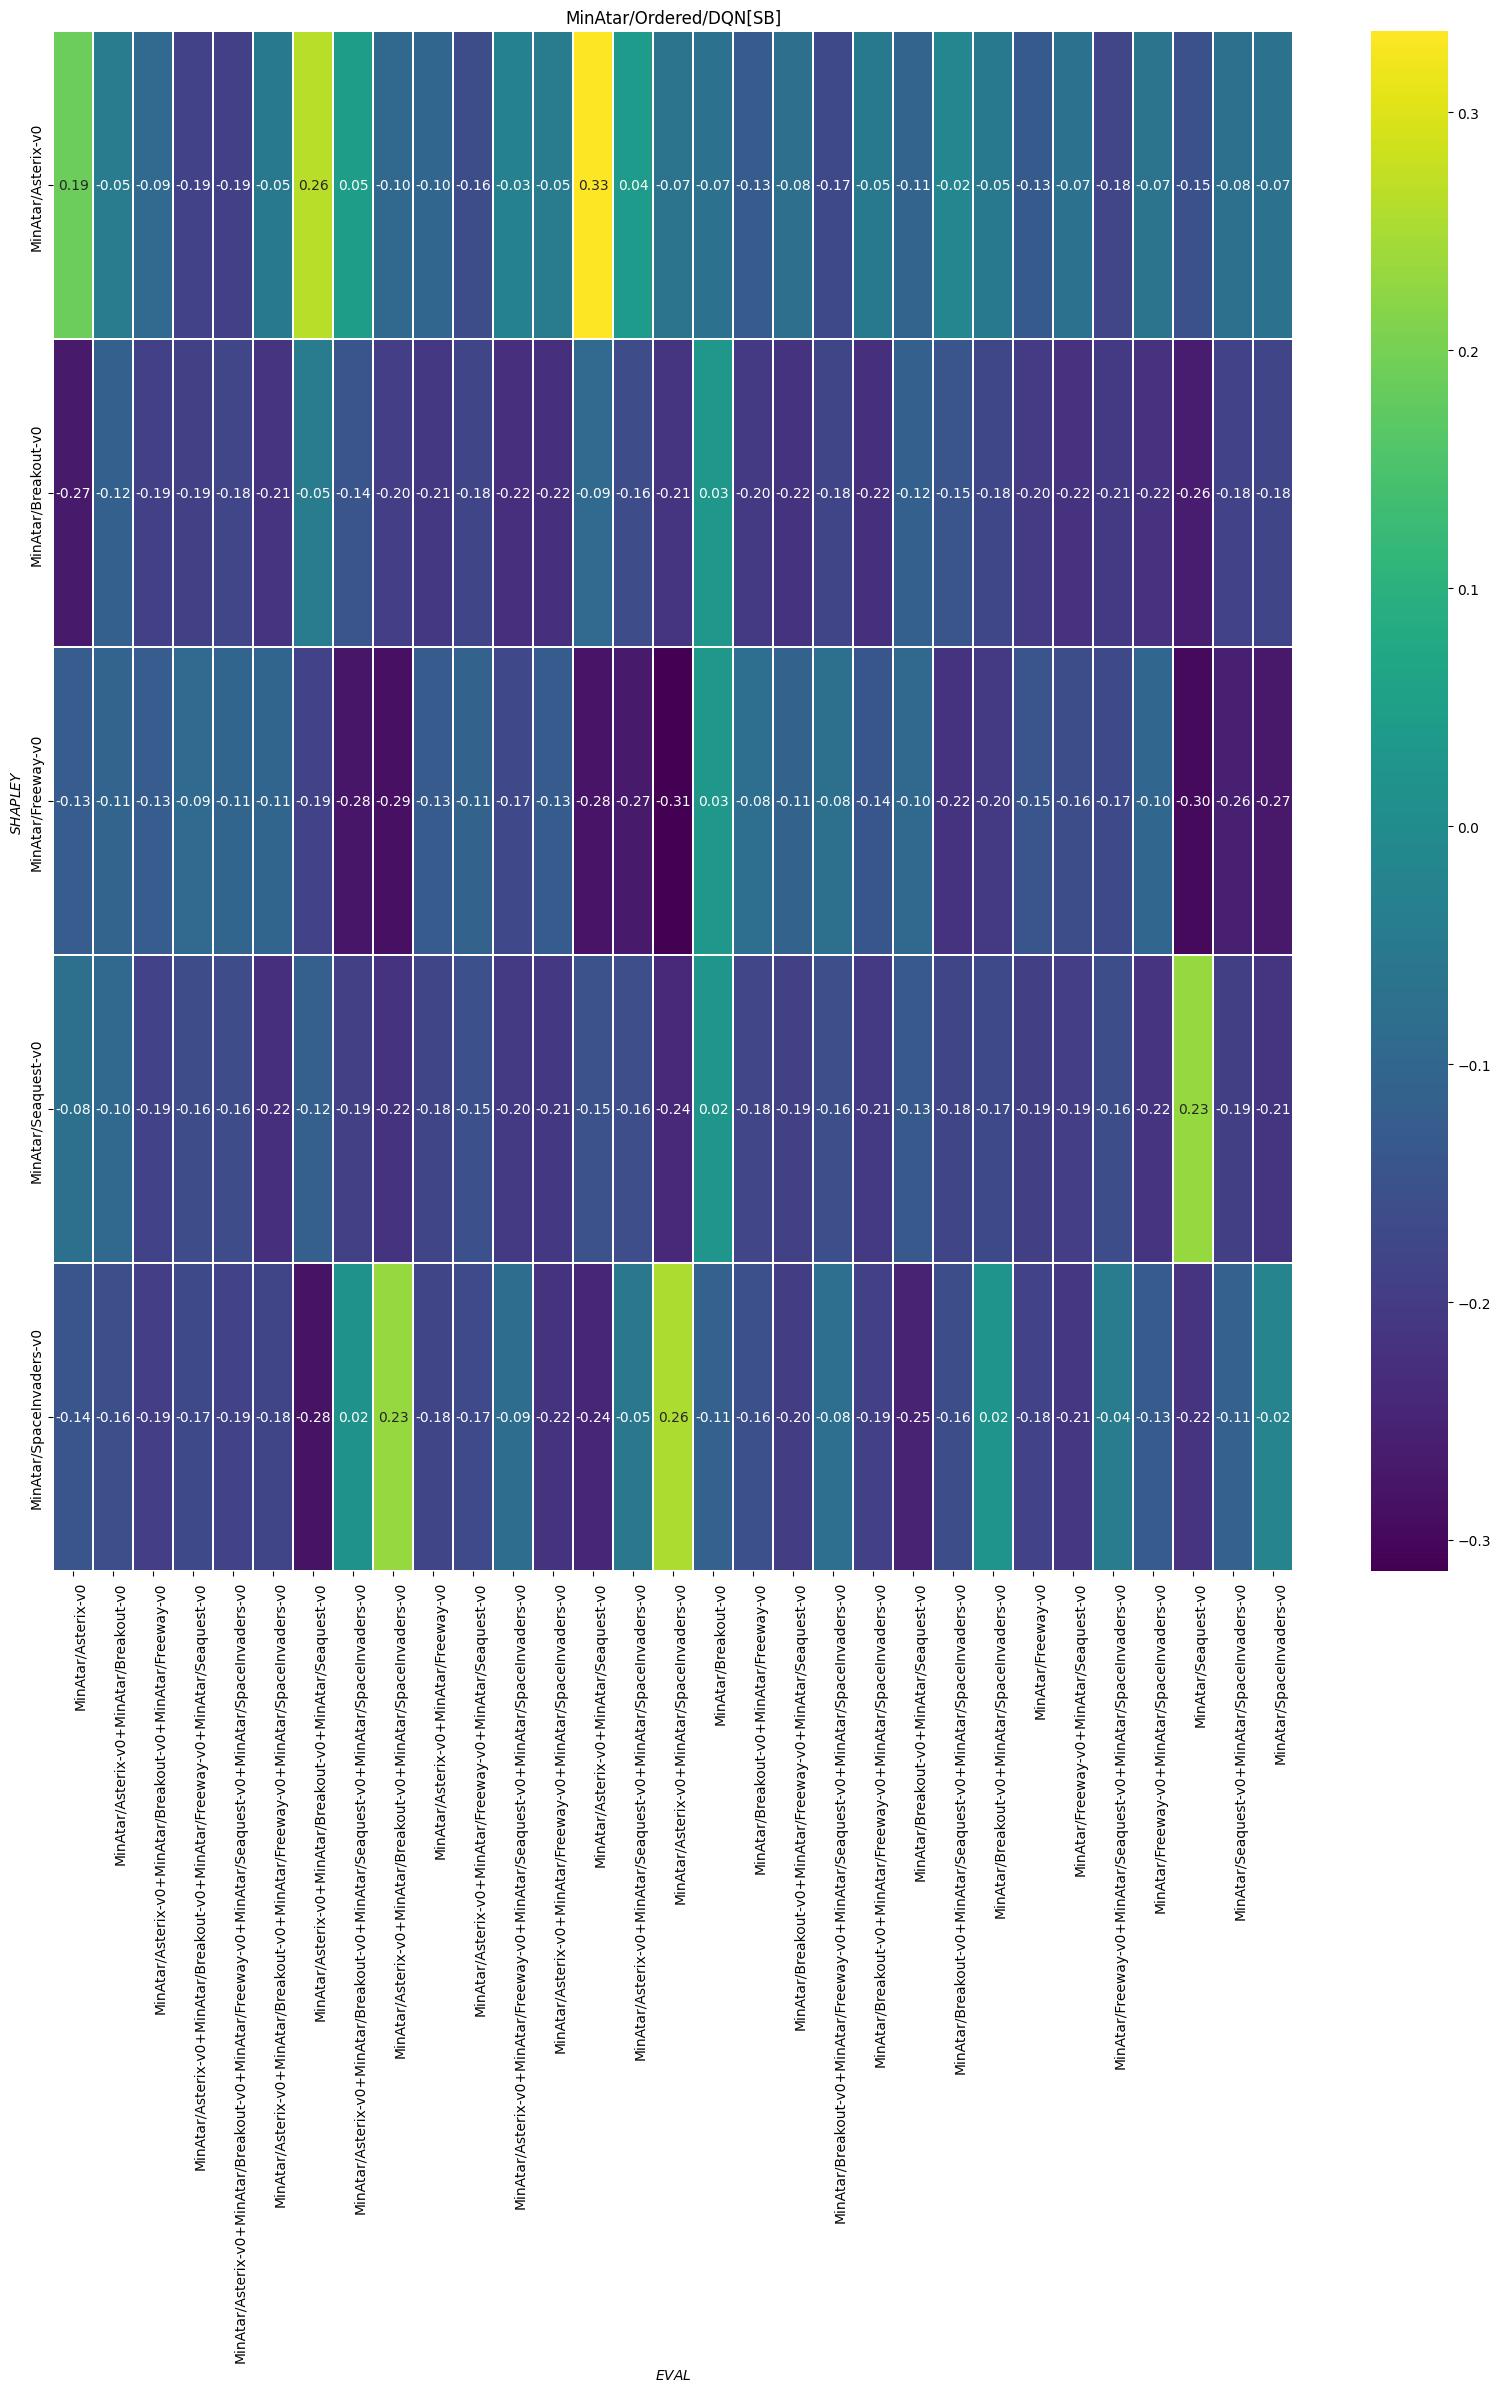

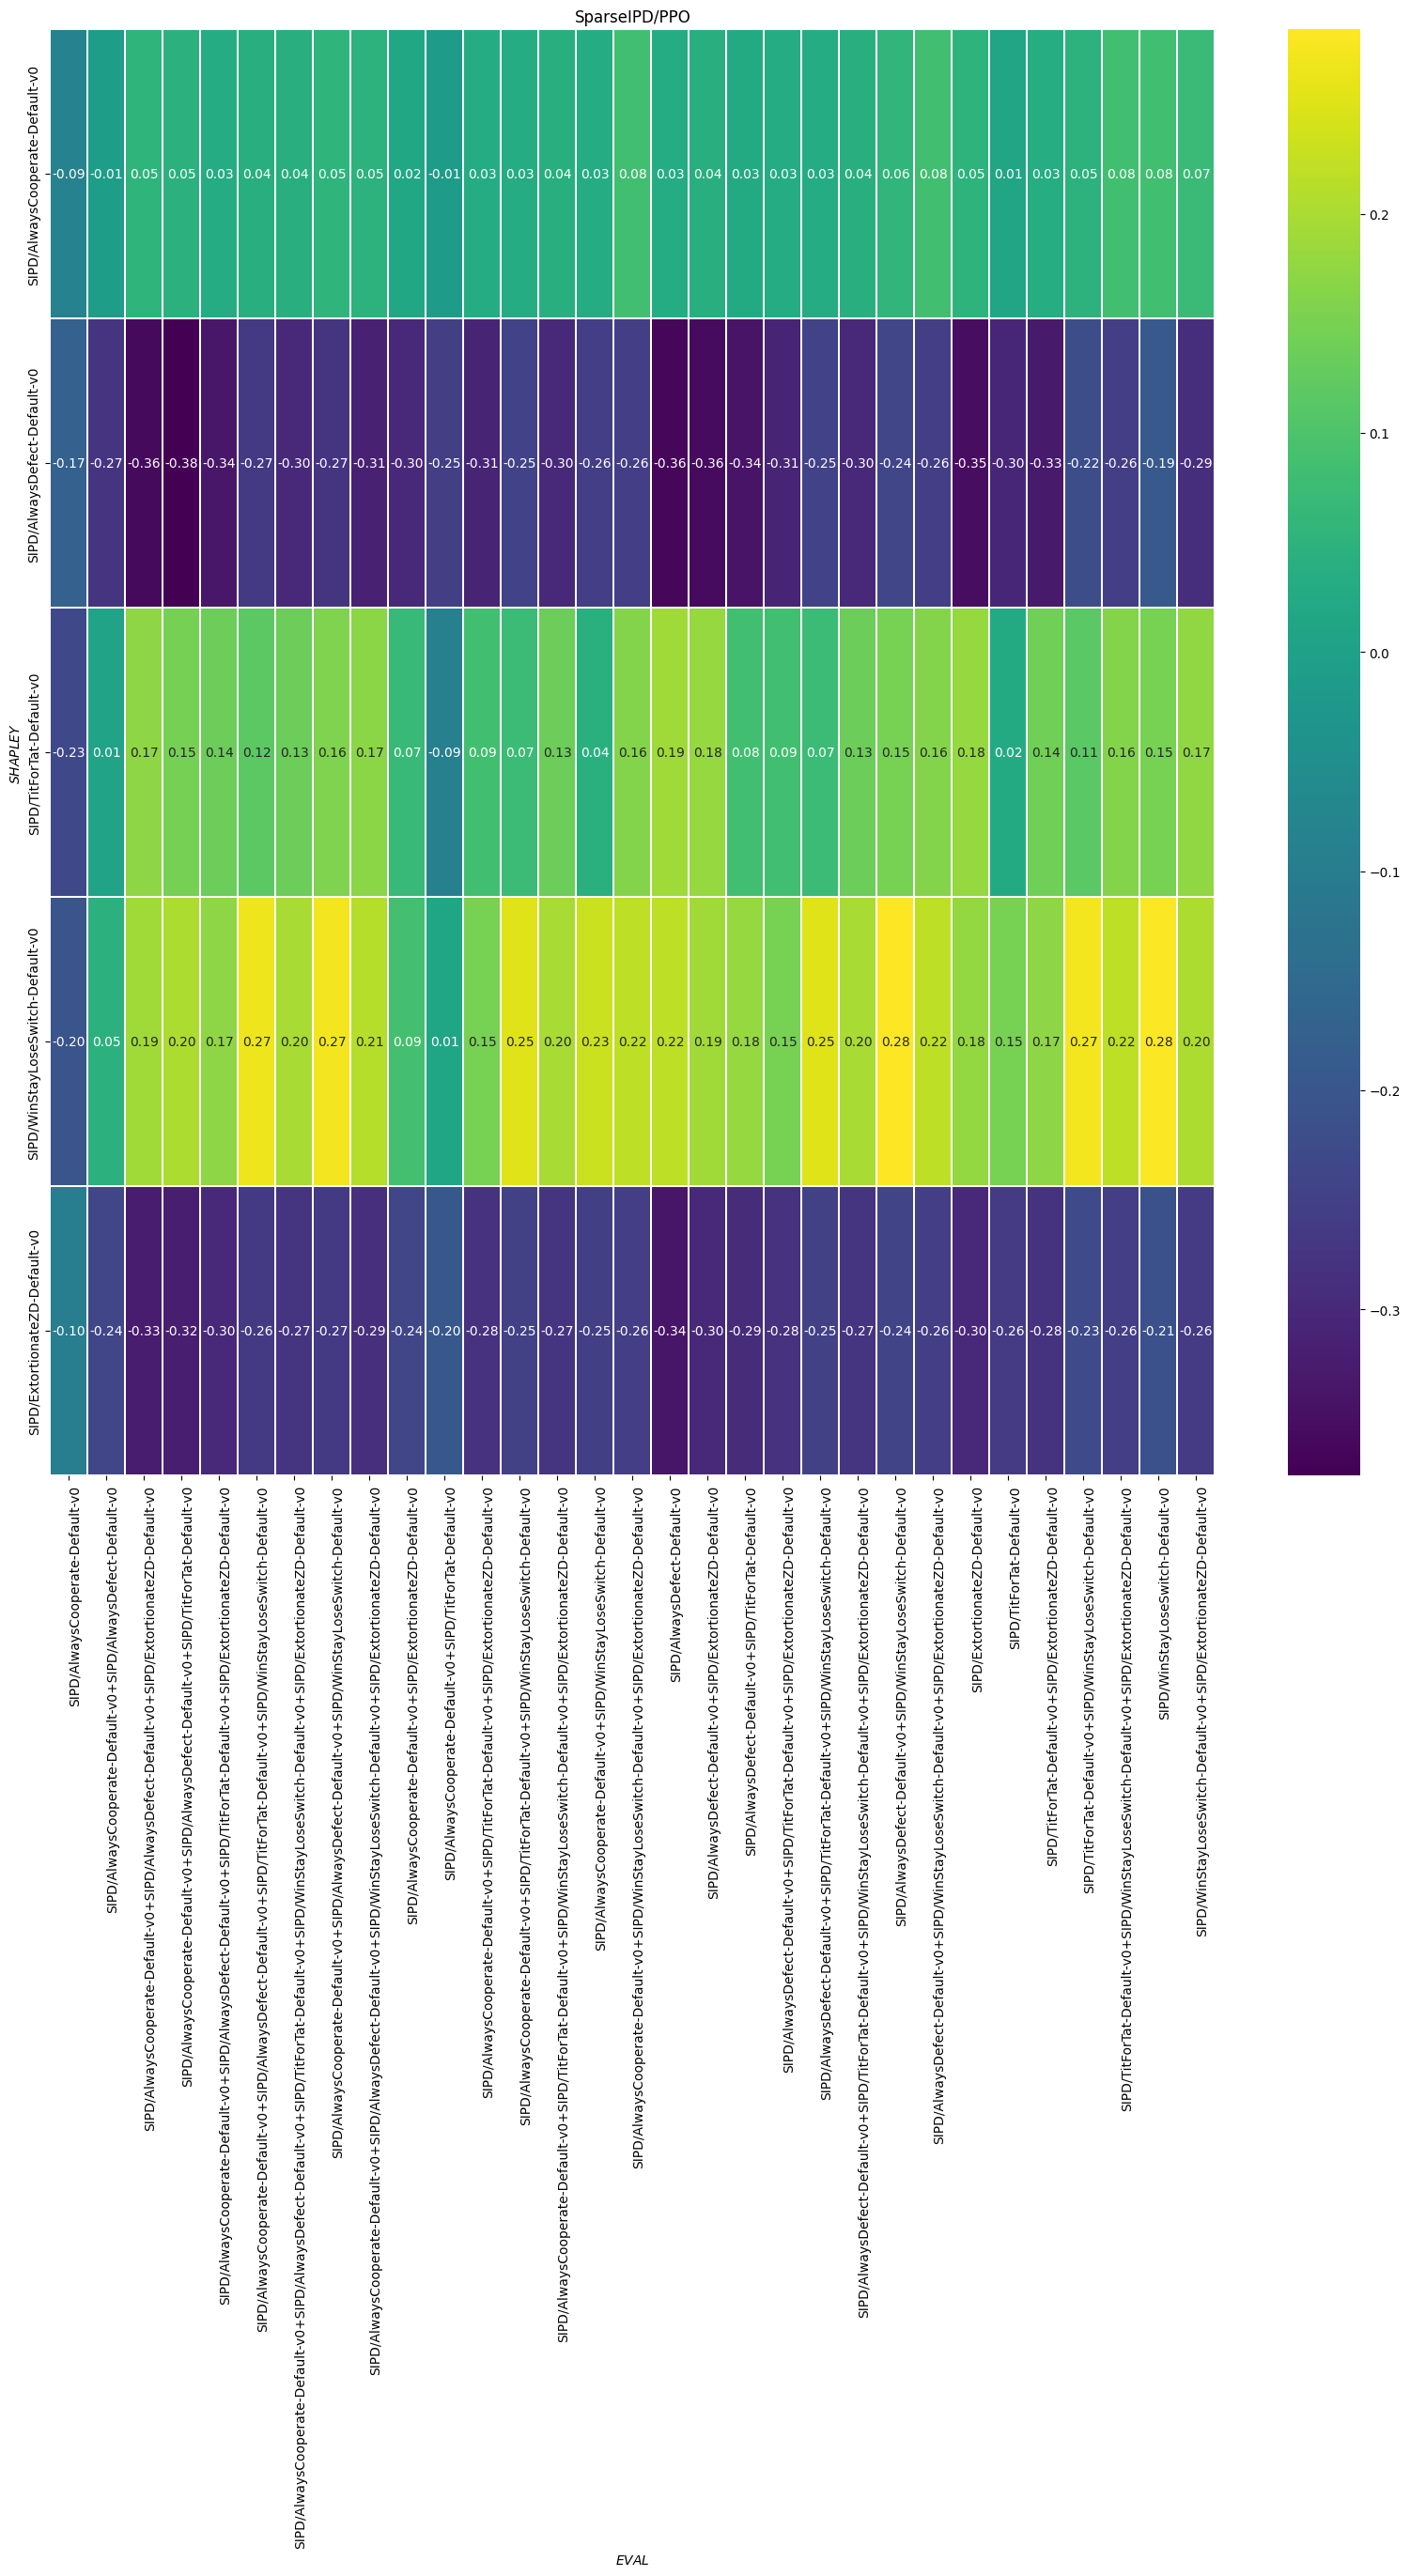

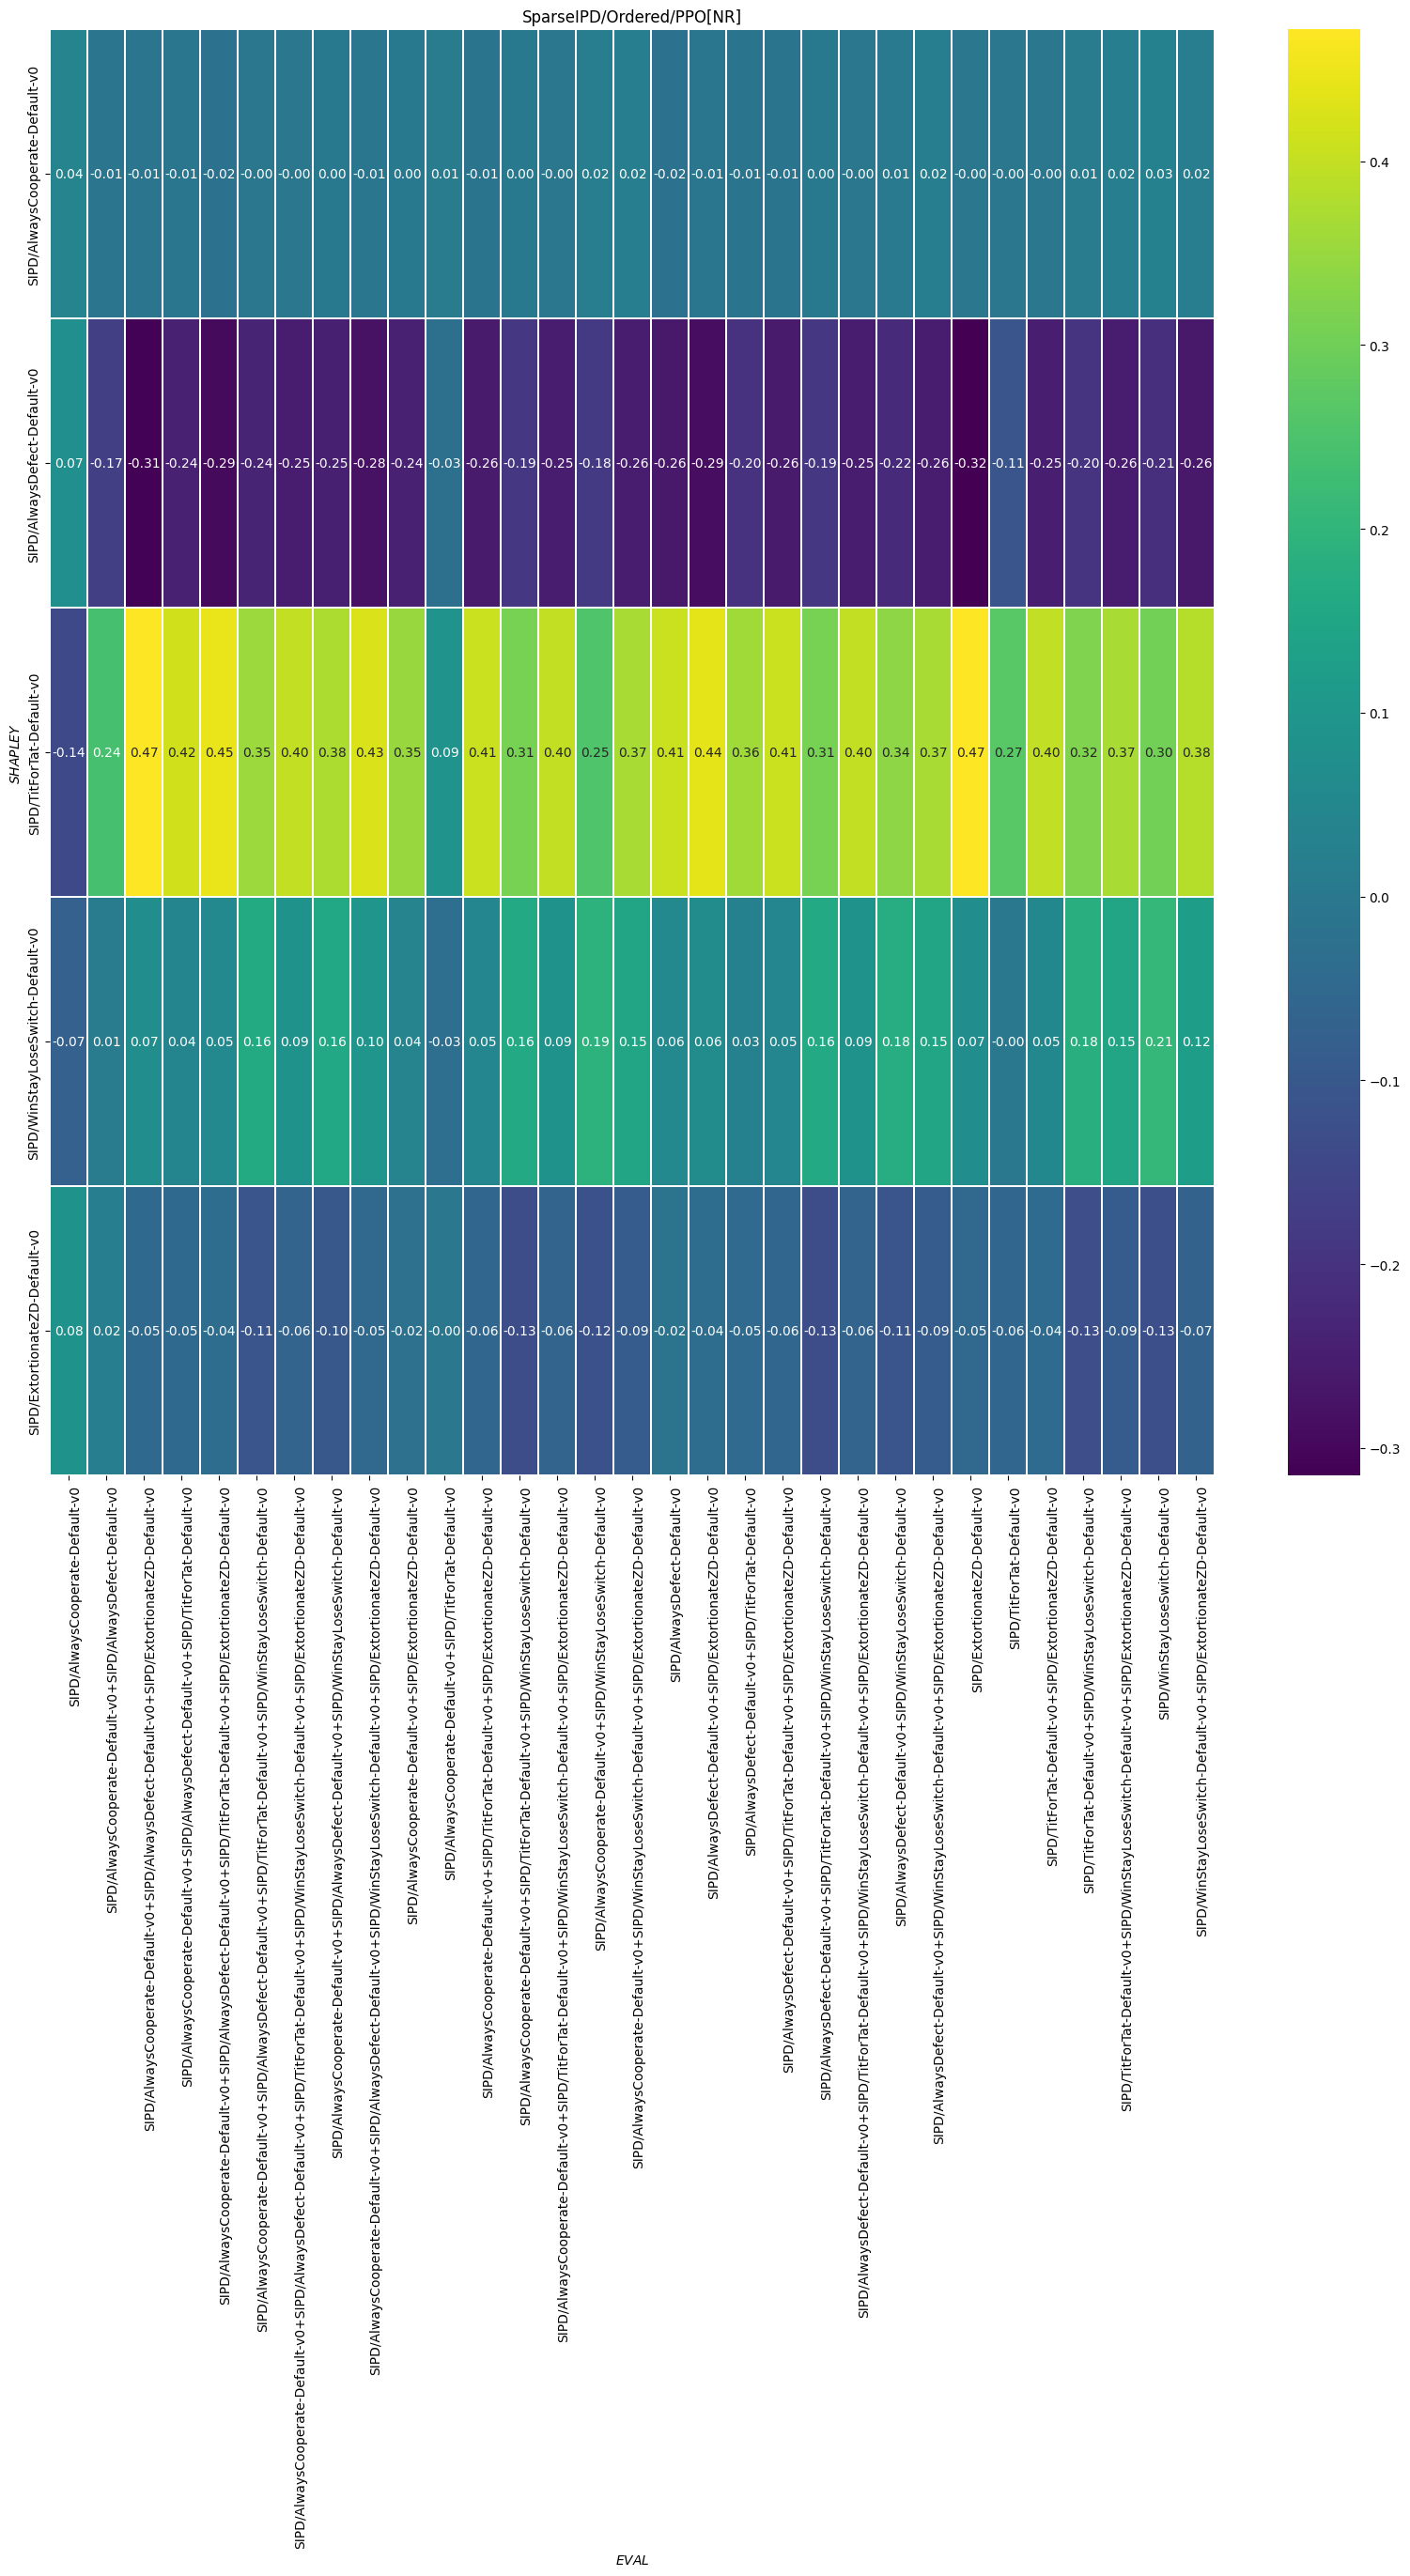

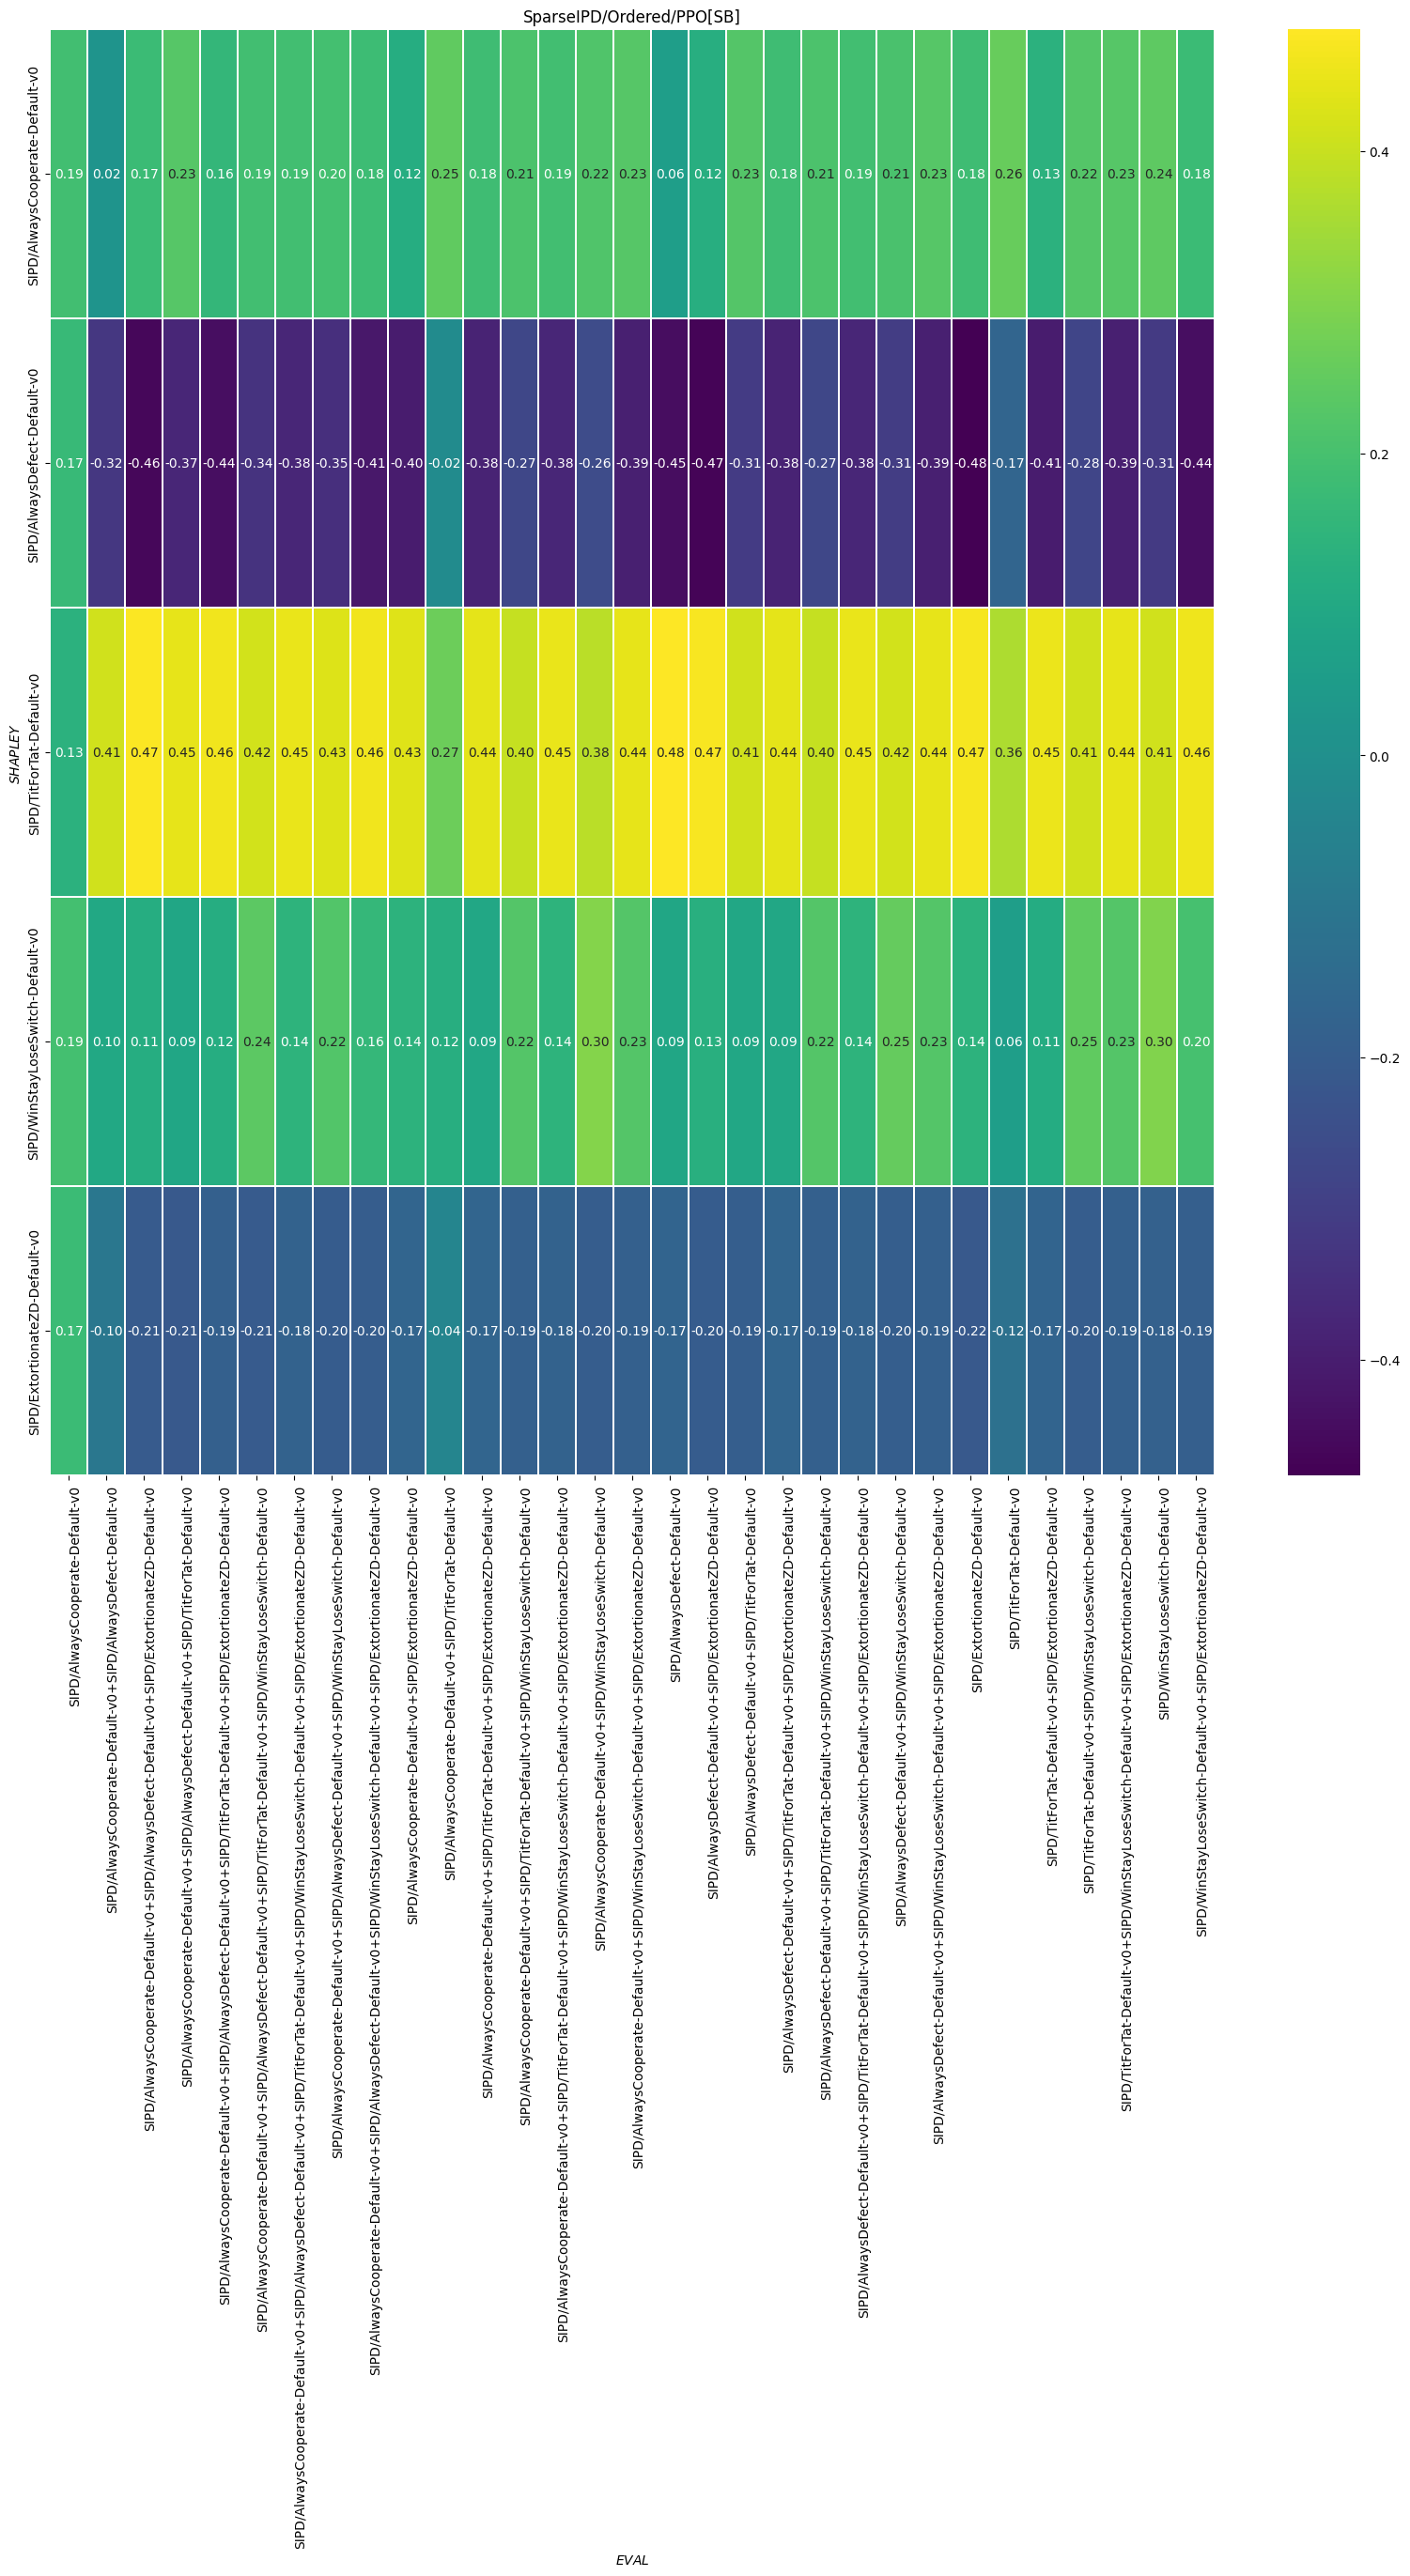

In [20]:
for result in TRAINER_RESULTS:
    display_shapley(TRAINER_RESULTS[result], result, pure_only=False)

In [26]:
df = pd.read_csv(
    TRAINER_RESULTS['MinAtar/DQN'],
    index_col=0
)
df.head()

,MinAtar/Asterix-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Freeway-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Freeway-v0+MinAtar/Seaquest-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Freeway-v0+MinAtar/Seaquest-v0+MinAtar/SpaceInvaders-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Freeway-v0+MinAtar/SpaceInvaders-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Seaquest-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/Seaquest-v0+MinAtar/SpaceInvaders-v0,MinAtar/Asterix-v0+MinAtar/Breakout-v0+MinAtar/SpaceInvaders-v0,MinAtar/Asterix-v0+MinAtar/Freeway-v0,...,MinAtar/Breakout-v0+MinAtar/Seaquest-v0,MinAtar/Breakout-v0+MinAtar/Seaquest-v0+MinAtar/SpaceInvaders-v0,MinAtar/Breakout-v0+MinAtar/SpaceInvaders-v0,MinAtar/Freeway-v0,MinAtar/Freeway-v0+MinAtar/Seaquest-v0,MinAtar/Freeway-v0+MinAtar/Seaquest-v0+MinAtar/SpaceInvaders-v0,MinAtar/Freeway-v0+MinAtar/SpaceInvaders-v0,MinAtar/Seaquest-v0,MinAtar/Seaquest-v0+MinAtar/SpaceInvaders-v0,MinAtar/SpaceInvaders-v0
MinAtar/Asterix-v0,0.151804,0.119318,-0.542913,-0.624462,0.267922,-0.421667,0.144926,0.144214,0.274833,-0.244223,...,0.146429,0.075445,0.291618,-0.403512,0.168939,0.532729,-0.432870,0.096212,0.061554,0.366467
MinAtar/Breakout-v0,-0.102491,0.133636,-0.018302,0.053898,-0.222945,0.245000,-0.036193,-0.004088,0.146533,0.047802,...,0.039610,0.006753,0.234995,-0.005028,-0.211869,0.121377,0.023264,-0.084091,-0.004414,0.175330
MinAtar/Freeway-v0,-0.292955,-0.171212,0.127025,0.141801,0.218607,0.301042,-0.167435,-0.184830,-0.449233,0.239110,...,-0.095779,-0.117279,-0.254486,0.222521,0.126515,0.387560,0.224884,-0.055303,-0.111441,-0.355552
MinAtar/Seaquest-v0,0.015206,0.044773,0.226713,0.165054,0.085959,0.347708,-0.152860,-0.189611,-0.187633,0.260583,...,-0.235498,-0.195049,-0.207846,0.216460,-0.057828,0.305435,0.288657,-0.359091,-0.202725,-0.281152
MinAtar/SpaceInvaders-v0,0.028093,-0.017879,0.057555,0.009409,0.034589,0.101875,0.005012,0.010344,-0.079067,0.086043,...,-0.020996,0.017323,-0.211547,0.091529,-0.141667,0.375000,0.154167,0.065152,0.021419,-0.296579


In [30]:
df.sum(axis=1)

MinAtar/Asterix-v0          0.963852
MinAtar/Breakout-v0         1.155475
MinAtar/Freeway-v0          0.117888
MinAtar/Seaquest-v0         0.749230
MinAtar/SpaceInvaders-v0    0.762609
dtype: float64